In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re

In [34]:
all_files = glob('states?.csv*')
all_files

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [35]:
#concatenate all of those DataFrames together into one DataFrame, called something like us_census.
us_census = pd.concat((pd.read_csv(f, index_col=0) for f in all_files), ignore_index=True)
display(us_census)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [36]:
#Look at the .columns and the .dtypes of the us_census DataFrame
print(f'columns of us_census: \n{us_census.columns}\n')
print(f'\ndtype of us_census: \n {us_census.dtypes}')

columns of us_census: 
Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')


dtype of us_census: 
 State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


In [37]:
#Look at the .head() of the DataFrame so that you can understand.....
display(us_census.head())

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [39]:
#Use regex to turn the Income column into a format that is ready for conversion into a numerical type.
us_census['Income'] = us_census['Income'].replace({'\$':''}, regex=True).astype(float)
us_census['Income'].dtype


dtype('float64')

In [40]:
#Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column....
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_',1, expand=True)
us_census[:3] #just to check sample if data split or not

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F


In [43]:
#Convert both of the columns into numerical datatypes.
#There is still an M or an F character in each entry! We should remove those before we convert.
us_census['Women'] = us_census.Women.str.replace('F', '')
us_census['Men'] = us_census.Men.str.replace('M', '')
display(us_census.head())

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329


In [44]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
display(us_census['Men'].dtypes, us_census['Women'].dtype)

dtype('int64')

dtype('float64')

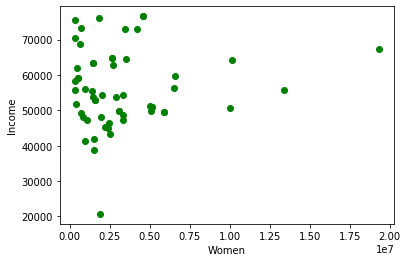

In [45]:
#Use matplotlib to make a scatterplot!

plt.scatter(us_census['Women'], us_census['Income'], color='g') 
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()


Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [46]:
NA_val_women = us_census['Women'][us_census['Women'].isnull()]
NA_val_women

23   NaN
24   NaN
31   NaN
Name: Women, dtype: float64

In [47]:
us_census['TotalPop'] = us_census['TotalPop'].astype(float)
na_women_val = us_census['TotalPop'] - us_census['Men']
us_census['Women'] = us_census['Women'].fillna(na_women_val)

In [48]:
us_census['Women']

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [49]:
#We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [54]:
#Drop those duplicates using the .drop_duplicates() function.
us_census.drop_duplicates(inplace=True)
print(us_census.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
29    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
47    False
49    False
50    False
51    False
52    False
53    False
55    False
56    False
57    False
58    False
59    False
dtype: bool


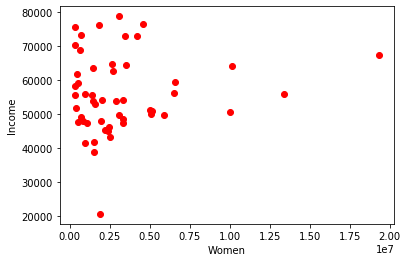

In [58]:
#Make the scatterplot again. Now, it should be perfect!
plt.scatter(us_census['Women'], us_census['Income'], color='r')
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.


In [60]:
#You will have to get the columns into numerical format, and those percentage signs will have to go.
us_census['Hispanic'] = us_census['Hispanic'].str.replace("%",'')
us_census['White'] = us_census['White'].str.replace("%",'')
us_census['Black'] = us_census['Black'].str.replace("%",'')
us_census['Native'] = us_census['Native'].str.replace("%",'')
us_census['Asian'] = us_census['Asian'].str.replace("%",'')
us_census['Pacific'] = us_census['Pacific'].str.replace("%",'')
us_census.head()


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620.0,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375.0,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928.0,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208.0,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464.0,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,19087135M_19334329F,19087135,19334329.0


In [61]:
races_columns = ['Hispanic','White','Black','Native','Asian','Pacific']
us_census[races_columns] = us_census[races_columns].apply(pd.to_numeric)
us_census.dtypes

State         object
TotalPop     float64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

In [62]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
29    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
47    False
49    False
50    False
51    False
52    False
53    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

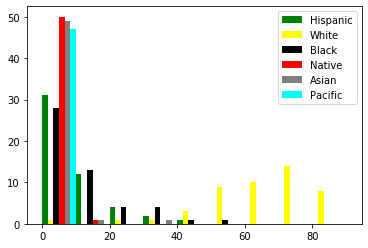

In [68]:
#making histogram
Hispanic = us_census.Hispanic
White = us_census.White
Black = us_census.Black
Native = us_census.Native
Asian = us_census.Asian
Pacific = us_census.Pacific
bins = [0,10,20,30,40,50,60,70,80,90.100]
labels = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
plt.hist([Hispanic, White, Black, Native, Asian, Pacific],bins, histtype='bar',
         rwidth=10, color = ['g','yellow','k','r','gray','cyan'], label=labels)
plt.legend()
plt.show()

# PART-2

In [69]:
#Load the data into a DataFrame called inventory
inventory = pd.read_csv('inventory.csv')
display(inventory)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [70]:
#The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

staten_island = inventory[:10]
display(staten_island)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [71]:
#Select the column product_description from staten_island and save it to the variable product_request.
product_request = staten_island['product_description']
display(product_request)

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [72]:
#Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

seed_request = inventory.loc[(inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds')]
display(seed_request)

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [73]:
#Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.
inventory['in_stock'] = np.where((inventory.quantity > 0), True, False)
display(inventory)

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [74]:
#Create a column called total_value that is equal to price multiplied by quantity.
inventory['total_value'] = inventory.price * inventory.quantity
display(inventory.head())

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


In [77]:
#The following lambda function combines product_type and product_description into a single string
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

In [78]:
inventory['full_description'] = inventory[['product_type', 'product_description']].apply(combine_lambda, axis=1)
display(inventory.head())

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
